**Merging transactions**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
'''Only to be used if "all_tranformations.csv" does not exist.'''
# df = pd.read_csv("data/transactions_1.csv")
# df2 = pd.read_csv("data/transactions_2.csv")
# df3 = pd.read_csv("data/transactions_3.csv")

# #combining datasets in one CSV
# transactions=pd.concat([df,df2,df3], ignore_index = True)

# #saving to directory
# transactions.to_csv(r'data/all_transactions.csv', index = False)

**Merging datagrames**

In [ ]:
df = pd.read_csv("data/all_transactions.csv")
df2 = pd.read_csv("data/users.csv")
df3 = pd.read_csv("data/devices.csv")
df4 = pd.merge(df2, df3[df3.brand != "Unknown"], on='user_id')
data = pd.merge(df4, df, on='user_id')
# df = pd.merge(df, df3, on='user_id')
# data = pd.merge(df, df2, on='user_id')

**Renaming columns**

In [ ]:
data = data.rename(columns={"created_date_x": "user_created_date", "created_date_y": "transaction_created_date", "country": "user_country"})

**Removing unnecessary columns**

In [ ]:
data = data.drop(['city', 'attributes_notifications_marketing_push', 'attributes_notifications_marketing_email', 'num_successful_referrals', 'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country', 'num_referrals'], axis=1)

**Column Tranformations**

In [ ]:
plan_ = {"STANDARD": 0,"SILVER": 1,"GOLD": 1}
data['plan'] = data['plan'].map(plan_)

In [ ]:
currency_ = {'AED' : 0, 'SEK' : 0, 'AUD' : 0, 'GBP' : 0, 'ETH' : 1, 'RUB' : 0, 'CHF' : 0, 'HRK' : 0, 'LTC' : 1, 'MAD' : 0, 'BTC' : 1, 'NZD' : 0, 'JPY' : 0, 'ILS' : 0, 'QAR' : 0, 'MXN' : 0, 'DKK' : 0, 'SGD' : 0, 'ZAR' : 0, 'BGN' : 0, 'USD' : 0, 'INR' : 0, 'THB' : 0, 'RON' : 0, 'HUF' : 0, 'TRY' : 0, 'XRP' : 1, 'PLN' : 0, 'EUR' : 0, 'BCH' : 1, 'CZK' : 0, 'CAD' : 0, 'NOK' : 0, 'HKD' : 0, 'SAR' : 0}
data['transactions_currency'] = data['transactions_currency'].map(currency_)

In [ ]:
currency_ = {'FAILED': 0, 'DECLINED': 0, 'COMPLETED': 1, 'REVERTED': 2, 'PENDING': 0, 'CANCELLED': 0}
data['transactions_state'] = data['transactions_state'].map(currency_)

In [ ]:
brands = {"Android": 0,"Apple": 1}
data['brand'] = data['brand'].map(brands)

In [ ]:
# SWEU --> south western eu
# EEU --> Eastern Europe
# CEU --> Central Europe
# SWEU --> South Western Europe
# WEU --> Western Europe
# NEU ---> Norhern Europe
# AS --> ASIA
# NA --> northamerica
# AF --> Africa
# OC --> Oceania

#(oceania,namerica,africa,SEU)
#(SWEU,CEU,NEU,EEU)
#(Western Europe)


continents_ = {'ES':'SWEU', 'LT':'EEU', 'IE':'WEU', 'GB':'WEU', 'MT':'SWEU', 'FR':'SWEU', 'RO':'SWEU', 'PL':'EEU', 'AT':'CEU', 'IT':'SWEU', 'SI':'CEU', 'CZ':'CEU', 'BE':'WEU', 'BG':'SWEU', 'GI':'SWEU', 'CH':'AS', 'GG':'SWEU', 'CY':'SWEU', 'DE':'CEU', 'SK':'CEU', 'GR':'SEU', 'DK':'NEU', 'PT':'SWEU', 'LU':'NEU', 'HR':'SWEU', 'NL':'NEU', 'SE':'NEU', 'LV':'EEU', 'IM':'NEU', 'FI':'NEU', 'EE':'EEU', 'JE':'SWEU', 'HU':'CEU', 'NO':'NEU', 'RE':'AF', 'IS':'NEU', 'GP':'NA', 'AU':'OC', 'LI':'EEU', 'MQ':'NA'}
data['user_country'] = data['user_country'].map(continents_)


#Appending new Continents
new_continents_ = {'OC':'rest_of_the_world','NA':'rest_of_the_world','AF':'rest_of_the_world','SEU':'rest_of_the_world','AS':'rest_of_the_world',
               'SWEU':'Central_Europe','CEU':'Central_Europe','NEU':'Central_Europe','EEU':'Central_Europe',
                 'WEU':'Western_Europe'}

data['user_country'] = data['user_country'].map(new_continents_)


# Renaming Column
data = data.rename(columns={"user_country": "continent"})

In [ ]:
data = data[(data.transactions_state == 1) | (data.transactions_state == 2)]

In [ ]:
data['continent'].value_counts()

In [ ]:
data['continent'].isna().sum()

**Plots**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
carrier_count = df2['country'].value_counts()
carrier_count.plot(figsize=(20,15))
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)

plt.title('Users Per Country',fontsize=19)
plt.ylabel('Number of Users', fontsize=19)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation=60,fontsize=14)

plt.show()

In [ ]:
carrier_count = data['continent'].value_counts()
carrier_count.plot(figsize=(10,10))
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)

plt.title('Transactions Per Continent',fontsize=19)
plt.ylabel('Number of transactions', fontsize=19)
plt.xticks(fontsize=14)

plt.show()

**Aggregating**

In [ ]:
def age_bands(year):
    year = 2020 - year
    if year < 25:
        return 0
    elif year < 35:
        return 1
    elif year < 45:
        return 2
    elif year < 55:
        return 3
    elif year < 65:
        return 4
    return 5

In [ ]:
data.head()

In [ ]:
# Demographics
users_agg_df = data.groupby(['user_id']).agg({'birth_year': 'first','transactions_currency': 'first', 'continent': 'first', 'user_created_date': 'first', 'user_settings_crypto_unlocked': 'first', 'plan': 'first', 'num_contacts': 'first', 'brand': 'first'}).reset_index()
users_agg_df["birth_year"] = users_agg_df["birth_year"].apply(lambda x: age_bands(x))
users_agg_df

In [ ]:
# First and last transaction of each user
first_transactions_date_agg = data.groupby(["user_id"]).agg({'transaction_created_date': 'min'}).reset_index().rename(columns={"transaction_created_date": "first_transaction_date"})
last_transactions_date_agg = data.groupby(["user_id"]).agg({'transaction_created_date': 'max'}).reset_index().rename(columns={"transaction_created_date": "last_transaction_date"})
transactions_date_agg = pd.merge(first_transactions_date_agg, last_transactions_date_agg, on="user_id")
transactions_date_agg

In [ ]:
# Total transactions
user_transactions = data.groupby(["user_id"]).agg({'transaction_created_date': 'count'}).reset_index().rename(columns={"transaction_created_date": "n_transactions"})
user_transactions

In [ ]:
# Total amounts of each user
transactions_total_agg = data[data.transactions_state == 1].groupby(["user_id"]).agg({'amount_usd': 'sum'}).reset_index()
transactions_total_agg = transactions_total_agg.rename(columns={"amount_usd": "amount_total"})
transactions_total_rev = data[data.transactions_state == 2].groupby(["user_id"]).agg({'amount_usd': 'sum'}).reset_index().rename(columns={'amount_usd': 'amount_reverted'})


transactions_total_agg = pd.merge(transactions_total_agg, transactions_total_rev, on="user_id", how="left").fillna(0.0)#converting NaN to 0

transactions_total_agg["total_amount"] = transactions_total_agg["amount_total"] - transactions_total_agg["amount_reverted"]
transactions_total_agg = transactions_total_agg[["user_id", "total_amount"]]
transactions_total_agg

In [ ]:
# Final df for classification
classification_df = pd.merge(users_agg_df, transactions_date_agg, on='user_id')
classification_df = pd.merge(classification_df, transactions_total_agg, on='user_id')
classification_df = pd.merge(classification_df, user_transactions, on='user_id')
classification_df.head()

In [ ]:
#calculating how many days since First Transaction
classification_df['first_transaction_date'] = pd.to_datetime(classification_df['first_transaction_date'])
classification_df['last_transaction_date'] = pd.to_datetime(classification_df['last_transaction_date'])

delta = classification_df['last_transaction_date'] - classification_df['first_transaction_date']
classification_df['Days_Since_First_Transaction'] = delta.dt.days.astype(int)





In [ ]:
#classification_df.head()
classification_df.tail()

In [ ]:
# The last day is considered as the date where the last_transaction was made in general(taking into account the completed minus reverted 2019-05-15 )
last_day = max(classification_df.last_transaction_date)

In [ ]:
#calculating how many days since Last Transaction
#calculating how many days since user was Inactive

delta = last_day - classification_df['last_transaction_date']
classification_df['Days_Since_Last_Transaction'] = delta.dt.days.astype(int)



In [ ]:

classification_df.head()

In [ ]:
#calculating how many days since user was Active

classification_df['user_created_date'] = pd.to_datetime(classification_df['user_created_date'])

delta = classification_df['last_transaction_date']-classification_df['user_created_date']
classification_df['Days_User_is_active'] = delta.dt.days.astype(int)

In [ ]:
classification_df.dtypes

In [ ]:
classification_df.head()

In [ ]:
classification_df['n_transactions'].describe()

In [ ]:
classification_df['Days_Since_First_Transaction'].describe()

In [ ]:
classification_df['Days_Since_Last_Transaction'].describe()

In [ ]:
classification_df['Days_User_is_active'].describe()

In [ ]:
# set a threshold at 45 days
sns.distplot(classification_df.Days_Since_Last_Transaction)
plt.axvline(45, color='red')

# Clustering Approach


In [158]:
classification_df.columns

Index(['user_id', 'birth_year', 'transactions_currency', 'continent',
       'user_created_date', 'user_settings_crypto_unlocked', 'plan',
       'num_contacts', 'brand', 'first_transaction_date',
       'last_transaction_date', 'total_amount', 'n_transactions',
       'Days_Since_First_Transaction', 'Days_Since_Last_Transaction',
       'Days_User_is_active'],
      dtype='object')

In [ ]:
pd.crosstab(index=classification_df['plan'],columns=classification_df['user_settings_crypto_unlocked'])

In [ ]:
pd.crosstab(index=classification_df['birth_year'],columns=classification_df['transactions_currency'])

In [166]:
#birth_year,transactions_currency,continent,brand,total_amount,n_transactions,Days_User_is_active
cluster_set = classification_df[['birth_year','transactions_currency','continent','brand','total_amount','n_transactions','Days_User_is_active']]
#cluster_set = classification_df.iloc[:, [1, 2, 3, 8,11,12,15]].values

In [167]:
cluster_set

,birth_year,transactions_currency,continent,brand,total_amount,n_transactions,Days_User_is_active
0,1,0,Central_Europe,1,6892.45,528,241
1,2,0,Central_Europe,1,12953.66,139,477
2,0,1,Central_Europe,1,5381.07,126,469
3,1,0,Central_Europe,0,3716.07,58,83
4,1,0,Central_Europe,1,843.12,43,408
...,...,...,...,...,...,...,...
14784,1,0,Central_Europe,1,239.65,6,330
14785,4,0,Western_Europe,1,1680.76,32,74
14786,1,0,Western_Europe,0,4046.05,136,251
14787,1,0,Central_Europe,0,520.52,31,72


In [168]:
#one hot encoding
dum = pd.get_dummies(cluster_set.continent)
cluster_set = pd.concat([cluster_set, dum], axis=1)
cluster_set = cluster_set.drop(columns=['continent']).rename(columns={'birth_year': 'age_band'})
cluster_set.head()

,age_band,transactions_currency,brand,total_amount,n_transactions,Days_User_is_active,Central_Europe,Western_Europe,rest_of_the_world
0,1,0,1,6892.45,528,241,1,0,0
1,2,0,1,12953.66,139,477,1,0,0
2,0,1,1,5381.07,126,469,1,0,0
3,1,0,0,3716.07,58,83,1,0,0
4,1,0,1,843.12,43,408,1,0,0


In [ ]:
cluster_set.isna().sum()

In [ ]:
#from sklearn.preprocessing import RobustScaler# For outliers
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [ ]:
#cluster_scaled = RobustScaler().fit(cluster_set)

In [ ]:
X = preprocessing.normalize(cluster_set)

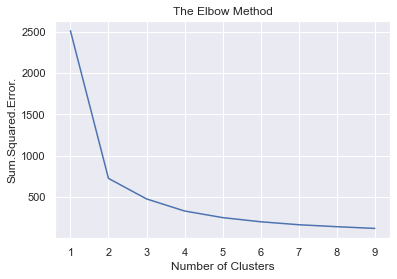

In [147]:
distortions = []
K = range(1, 10)
for k in K:
    kmeansModel = KMeans(n_clusters = k, init = 'k-means++', random_state = 23)
    kmeansModel.fit(X)
    distortions.append(kmeansModel.inertia_)
    
plt.plot(K, distortions)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Residual sum of Squares")
plt.show()

Text(0.5, 1.0, 'Inertia for different values of k')

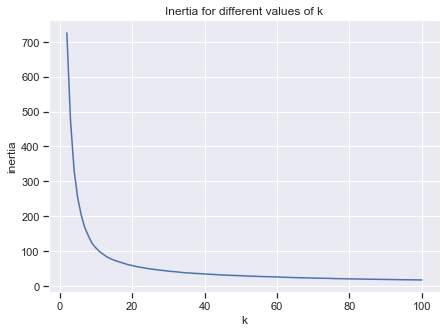

In [151]:
cluster_scores = []
for k in range(2, 101):
    km = KMeans(k,  init = 'k-means++', random_state = 23)
    km.fit(X)
    cluster_scores.append(km.inertia_)

#                                                PLOTTING:
#                              --------------------------------------------

# Create figure
fig = plt.figure(figsize=(7, 5))
ax = plt.subplot(111)

# Plot total inertia for all values of k
ax.plot(range(2, 101), cluster_scores)

# Aesthetic parameters
ax.set_xlabel('k')
ax.set_ylabel('inertia')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_title('Inertia for different values of k')

In [ ]:
#                                                PLOTTING:
#                              --------------------------------------------

# Create figure
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot(111)

# Draw first 6 values of k
plt.plot(range(2,8), cluster_scores[:6])
plt.annotate("elbow", xy=(3, cluster_scores[1]), xytext=(4, 6000),arrowprops=dict(arrowstyle="->"))
plt.annotate("elbow", xy=(4, cluster_scores[2]), xytext=(4, 6000),arrowprops=dict(arrowstyle="->"))
plt.annotate("elbow", xy=(5, cluster_scores[3]), xytext=(4, 6000),arrowprops=dict(arrowstyle="->"))

# Aesthetic parameters
ax.set_xlabel('k')
ax.set_ylabel('inertia')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_title('Elbow criterion')

Maximum average silhouette score for k = 2


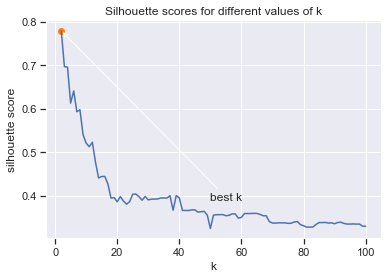

In [148]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 101):
    km = KMeans(k, init = 'k-means++', random_state = 23)
    km.fit(X)
    preds = km.predict(X)
    silhouette_scores.append(silhouette_score(X, preds))

#                                                PLOTTING:
#                              --------------------------------------------

# Find out the value of k which produced the best silhouette score
best_k = np.argmax(silhouette_scores) + 2  # +2 because range() begins from k=2 

# Create figure
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot(111)

# Draw figures
ax.plot(range(2, 101), silhouette_scores)
ax.scatter(best_k, silhouette_scores[best_k-2], color='#ff7f0e') 
ax.annotate("best k", xy=(best_k, silhouette_scores[best_k-2]), xytext=(50, 0.39), arrowprops=dict(arrowstyle="->"))

# Aesthetic parameters
ax.set_xlabel('k')
ax.set_ylabel('silhouette score')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_title('Silhouette scores for different values of k')

print('Maximum average silhouette score for k =', best_k)

Text(0.5, 1.0, 'Silhouette scores for different values of k')

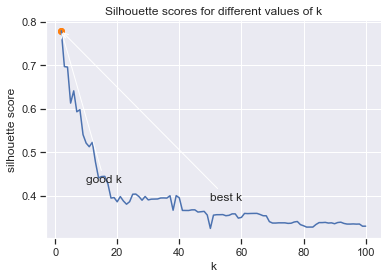

In [149]:
#                                                PLOTTING:
#                              --------------------------------------------

# Create figure
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot(111)

# Draw figure
ax.plot(range(2, 101), silhouette_scores)
ax.scatter([good_k, best_k], [silhouette_scores[good_k-2], silhouette_scores[best_k-2]], color='#ff7f0e')
ax.annotate("best k", xy=(best_k, silhouette_scores[best_k-2]), xytext=(50, 0.39), arrowprops=dict(arrowstyle="->"))
ax.annotate("good k", xy=(good_k, silhouette_scores[good_k-2]), xytext=(10, 0.43), arrowprops=dict(arrowstyle="->"))

# Aesthetic parameters
ax.set_xlabel('k')
ax.set_ylabel('silhouette score')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_title('Silhouette scores for different values of k')

# We are going to test 3 different clusters

In [150]:
kmeansModel = KMeans(n_clusters = 3, init = 'k-means++', random_state = 23)
kmeansModel.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

array([[1.44574600e-04, 0.00000000e+00, 1.44574600e-04, ...,
        1.44574600e-04, 0.00000000e+00, 0.00000000e+00],
       [1.54283073e-04, 0.00000000e+00, 7.71415363e-05, ...,
        7.71415363e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.85084437e-04, 1.85084437e-04, ...,
        1.85084437e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.46541703e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.46541703e-04, 0.00000000e+00],
       [1.89972652e-03, 0.00000000e+00, 0.00000000e+00, ...,
        1.89972652e-03, 0.00000000e+00, 0.00000000e+00],
       [6.98926710e-03, 0.00000000e+00, 6.98926710e-03, ...,
        6.98926710e-03, 0.00000000e+00, 0.00000000e+00]])

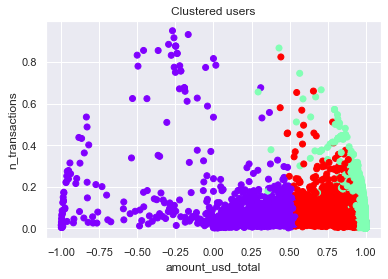

In [175]:
#0 age_band
#1 transactions_currency
#2 brand
# 3 total_amount
# 4 n_transactions
# 5 Days_User_is_active
# 6 Central_Europe 	
# 7 Western_Europe
# 8 rest_of_the_world






plt.scatter(X[:,3], X[:,4], c=kmeansModel.labels_, cmap='rainbow')
plt.title("Clustered users")
plt.xlabel("amount_usd_total")
plt.ylabel("n_transactions")
plt.show()

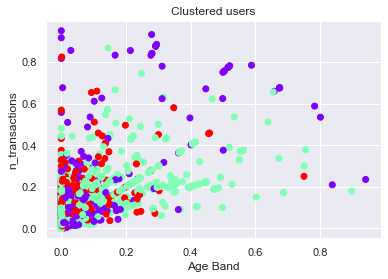

In [170]:


plt.scatter(X[:,0], X[:,4], c=kmeansModel.labels_, cmap='rainbow')
plt.title("Clustered users")
plt.xlabel("Age Band")
plt.ylabel("n_transactions")
plt.show()



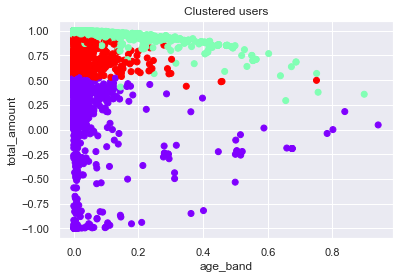

In [171]:
#0 age_band
#1 transactions_currency
#2 brand
# 3 total_amount
# 4 n_transactions
# 5 Days_User_is_active
# 6 Central_Europe 	
# 7 Western_Europe
# 8 rest_of_the_world

plt.scatter(X[:,0], X[:,3], c=kmeansModel.labels_, cmap='rainbow')
plt.title("Clustered users")
plt.xlabel("age_band")
plt.ylabel("total_amount")
plt.show()



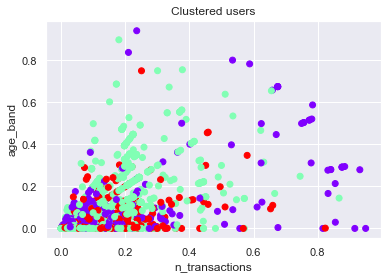

In [173]:
#0 age_band
#1 transactions_currency
#2 brand
# 3total_amount
# 4 n_transactions
# 5 Days_User_is_active
# 6 Central_Europe 	
# 7 Western_Europe
# 8 rest_of_the_world



plt.scatter(X[:,4], X[:,0], c=kmeansModel.labels_, cmap='rainbow')
plt.title("Clustered users")
plt.xlabel("n_transactions")
plt.ylabel("age_band")

plt.show()


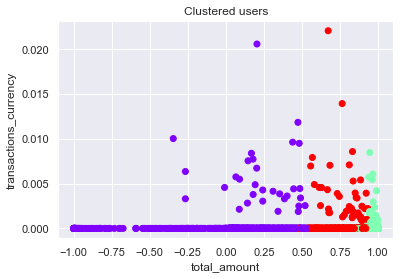

In [179]:
#0 age_band
#1 transactions_currency
#2 brand
# 3total_amount
# 4 n_transactions
# 5 Days_User_is_active
# 6 Central_Europe 	
# 7 Western_Europe
# 8 rest_of_the_world



plt.scatter(X[:,3], X[:,1], c=kmeansModel.labels_, cmap='rainbow')
plt.title("Clustered users")
plt.xlabel("total_amount")
plt.ylabel("transactions_currency")
plt.show()


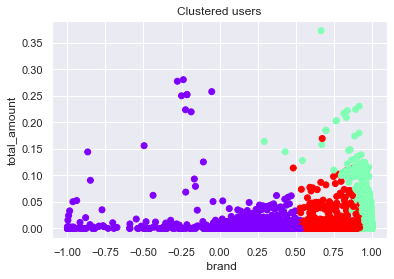

In [184]:
#0 age_band
#1 transactions_currency
#2 brand
# 3 total_amount
# 4 n_transactions
# 5 Days_User_is_active
# 6 Central_Europe 	
# 7 Western_Europe
# 8 rest_of_the_world



plt.scatter(X[:,3], X[:,2], c=kmeansModel.labels_, cmap='rainbow')
plt.title("Clustered users")
plt.xlabel("brand")
plt.ylabel("total_amount")
plt.show()

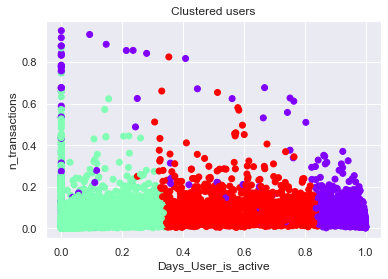

In [189]:
#0 age_band
#1 transactions_currency
#2 brand
# 3 total_amount
# 4 n_transactions
# 5 Days_User_is_active
# 6 Central_Europe 	
# 7 Western_Europe
# 8 rest_of_the_world



plt.scatter(X[:,5], X[:,4], c=kmeansModel.labels_, cmap='rainbow')
plt.title("Clustered users")
plt.xlabel("Days_User_is_active")
plt.ylabel("n_transactions")
plt.show()

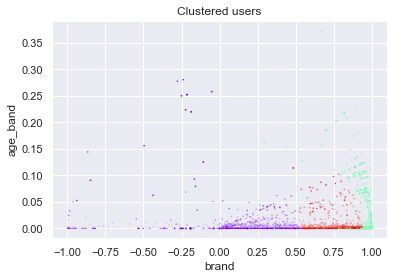

In [196]:
#0 age_band
#1 transactions_currency
#2 brand
# 3 total_amount
# 4 n_transactions
# 5 Days_User_is_active
# 6 Central_Europe 	
# 7 Western_Europe
# 8 rest_of_the_world



plt.scatter(X[:,3], X[:,2],X[:,0], c=kmeansModel.labels_, cmap='rainbow')
plt.title("Clustered users")
plt.xlabel("brand")
plt.ylabel("total_amount")
plt.ylabel("age_band")
plt.show()

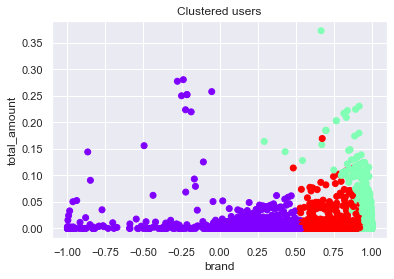

In [197]:
#0 age_band
#1 transactions_currency
#2 brand
# 3 total_amount
# 4 n_transactions
# 5 Days_User_is_active
# 6 Central_Europe 	
# 7 Western_Europe
# 8 rest_of_the_world



plt.scatter(X[:,3], X[:,2], c=kmeansModel.labels_, cmap='rainbow')
plt.title("Clustered users")
plt.xlabel("brand")
plt.ylabel("total_amount")

plt.show()

# One Hot Encoding


In [ ]:
#one hot encoding
dum = pd.get_dummies(classification_df.continent)
classification_df = pd.concat([classification_df, dum], axis=1)
classification_df['label'] = classification_df['plan']
classification_df = classification_df.drop(columns=['continent', 'plan']).rename(columns={'birth_year': 'age_band'})
classification_df.head()

**Train/test splitting**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = classification_df[['age_band', 'user_settings_crypto_unlocked', 'num_contacts', 'brand', 'total_amount', 'n_transactions', 'Central_Europe', 'Central_Europe', 'rest_of_the_world']]
y = classification_df['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

**Scaling**

In [ ]:
from sklearn.preprocessing import RobustScaler# For outliers

In [ ]:
scaler = RobustScaler().fit(x_train)

In [ ]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Balancing**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print(f'Number of users with plan 0 pre-balancing: {len(y_train[y_train == 0])} and with plan 1: {len(y_train[y_train == 1])}')

In [ ]:
sm = SMOTE(random_state=10)
x_train_res, y_train_res = sm.fit_resample(x_train_scaled, y_train)

In [ ]:
print(f'Number of users with plan 0 post-balancing: {len(y_train_res[y_train_res == 0])} and with plan 1: {len(y_train_res[y_train_res == 1])}')

**Models**

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix, classification_report,precision_score, recall_score


import pickle

class MLModels(object):
    x_train = None
    x_test = None
    y_train = None
    y_test = None
    model = None
    parameters = None
    best_estimator = None

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def grid_search(self):
        clf_ = GridSearchCV(
            self.model, param_grid=self.parameters, n_jobs=4, scoring='f1_macro'
        )
        clf_.fit(self.x_train, self.y_train)
        self.best_estimator = clf_.best_estimator_
        print(f"Best estimator recall: {clf_.best_score_}")
        y_pred_ = self.best_estimator.predict(self.x_test)
        print('Precision Score : ' + str(precision_score(self.y_test, y_pred_)))
        print(f'Recall Score : {recall_score(self.y_test, y_pred_)}')
        print(classification_report(self.y_test, y_pred_))
        print(confusion_matrix(self.y_test, y_pred_))
        
    def pickle_estimator(self, name):
        pickle.dump(self.best_estimator, open(f'{name}.pkl', 'wb'))
        
    def unpickle_estimator(self, name):
        self.best_estimator = pickle.load(open(f'{name}.pkl', 'rb'))
        
    def predict(self):
        y_pred_ = self.best_estimator.predict(self.x_test)
        print('Precision Score : ' + str(precision_score(self.y_test, y_pred_)))
        print(f'Recall Score : {recall_score(self.y_test, y_pred_)}')
        print(classification_report(self.y_test, y_pred_))
        print(confusion_matrix(self.y_test, y_pred_))

    def logistic_regression(self):
        self.model = LogisticRegression()
        self.parameters = [
            {
                'solver': ['saga'], 'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 1, 10, 25],
                'max_iter': [10, 20, 50, 100]
            },
            {
                'solver': ['sag', 'lbfgs'], 'penalty': ['l2'], 'C': [0.001, 0.01, 1, 10, 25],
                'max_iter': [10, 20, 50, 100]
            }
        ]

    def knn(self):
        self.model = KNeighborsClassifier()
        self.parameters = [
            {
                'n_neighbors': [3,9,15,21], 
                'leaf_size': [0,15,20,25,30],
                'p': [1,2],
                'algorithm': ['auto'],
                'weights':['uniform','distance']
            }
        ]
    def DecisionTree(self):
        self.model = DecisionTreeClassifier()
        self.parameters = [
            {
                'min_samples_leaf': [1,2,3,4], 
                
                'max_depth': [1,2,4,6],
                'ccp_alpha': [0.005,0.010,0.015,0.020,0.025],
                #'criterion': ['gini','entropy']
                
            }
        ]
        
    def Gaussian(self):
        self.model = GaussianNB()
        self.parameters = [
            {
                #'fit_prior': [True,False], 
                #'alpha': [0,1.0,1.5,3,5] 
                
                
            }
           
        ]

        
    def Bernouli(self):
        self.model = BernoulliNB()
        self.parameters = [
            {
                #'fit_prior': [True,False], 
                #'alpha': [0,1.0,1.5,3,5] 
                
                
            }
           
        ]
        
    def random_forest(self):
        self.model = RandomForestClassifier()
        self.parameters = \
            {
                'n_jobs': [-1], 'n_estimators': [10, 50, 100, 200], 'max_depth': [3, 5], 'criterion': ['gini', 'entropy']
            }

    def svm_classifier(self):
        self.model = SVC()
        self.parameters = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'sigmoid']}
        
        
    def Stohastic_gr_d(self):
        self.model = SGDClassifier()
        self.parameters = {'n_jobs': [-1], 
                           'alpha': [1, 0.1, 0.01, 0.001,0.0001,0.00001], 
                           'early_stopping': [True,False],
                           'learning_rate': ['optimal'],
                           'penalty': ['l1','l2'],
                           'loss': ['log','hinge','modified_huber','squared_hinge'],
                           'max_iter':[500,800,1000,1200],
                       
                           
                           
                          
                          }
        
model = MLModels(x_train_res, x_test_scaled, y_train_res, y_test)

In [ ]:
model.logistic_regression()
model.grid_search()
model.pickle_estimator("lr")

In [ ]:
model.knn()
model.grid_search()
model.pickle_estimator("lr")

In [ ]:
model.DecisionTree()
model.grid_search()
model.pickle_estimator("dt")

In [ ]:
model.Bernouli()
model.grid_search()
model.pickle_estimator("bnb")

In [ ]:
model.Gaussian()
model.grid_search()
model.pickle_estimator("gnb")

In [ ]:
#model.svm_classifier()
#model.grid_search()
#model.pickle_estimator("svm")

In [ ]:
model.random_forest()
model.grid_search()
model.pickle_estimator("rf")

In [ ]:
model.Stohastic_gr_d()
model.grid_search()
model.pickle_estimator("SGD")

**Tests and raw code**

In [ ]:
len(data[(data.transactions_state == 2) & (data.direction=="INBOUND")])

In [ ]:
pd.crosstab(index=data['transactions_type'],columns=data['transactions_state'])

In [ ]:
pd.crosstab(index=data['transactions_type'],columns=data['direction'])

In [ ]:
pd.crosstab(index=data['direction'],columns=data['transactions_state'])

In [ ]:
data[(data.user_id == "user_7") & (data.transactions_state == 2) & (data.amount_usd == 8.51) & (data.direction == "INBOUND")]

In [ ]:
data[data["user_id"] == "user_12038"].sort_values(by='transaction_created_date', ascending=True)

In [ ]:
pd.crosstab(index=data['transactions_type'],columns=data['ea_cardholderpresence'])

In [ ]:
data['num_contacts'].describe()

In [ ]:
data['ea_cardholderpresence'].value_counts()